In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-56.000, high=80.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

726

In [7]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | pahrump
Processing Record 9 of Set 1 | vrangel
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | san vicente
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | elko
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | wagar
Processing Record 20 of Set 1 | kautokeino
Processing Record 21 of Set 1 | lompo

Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | elizabeth city
Processing Record 39 of Set 4 | garoua
Processing Record 40 of Set 4 | bambanglipuro
Processing Record 41 of Set 4 | vawkavysk
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | hoquiam
Processing Record 45 of Set 4 | keti bandar
Processing Record 46 of Set 4 | ouadda
Processing Record 47 of Set 4 | manono
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | baft
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | moncao
Processing Record 3 of Set 5 | saint-augustin
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | katangli
Processing Record 6 of Set 5 | kolpashevo
Processing Record 7 of Set 5 | itaguai
Processing Record 8 of Set 5 | berlevag
Processing Record 9 of Set 5 | yialos
City not f

Processing Record 25 of Set 8 | padang
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | jaguarao
Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | wamba
Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | fonte boa
Processing Record 33 of Set 8 | karasjok
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | bluefield
Processing Record 36 of Set 8 | novosokolniki
Processing Record 37 of Set 8 | high level
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | punta arenas
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | tasiilaq
Processing Record 43 of Set 8 | zhezkazgan
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | tranas
Processing Record 46 of Set 8 | tibacuy
Processing Record 47 of Set 8 | karlstad
Processing Record 48 of Set 8 | ottawa
Processing Record 49 of Set 8 |

Processing Record 13 of Set 12 | salinas
Processing Record 14 of Set 12 | gao
Processing Record 15 of Set 12 | naryshkino
Processing Record 16 of Set 12 | iquitos
Processing Record 17 of Set 12 | satara
Processing Record 18 of Set 12 | glenwood springs
Processing Record 19 of Set 12 | galiakot
Processing Record 20 of Set 12 | turbat
Processing Record 21 of Set 12 | sabla
Processing Record 22 of Set 12 | panama city
Processing Record 23 of Set 12 | mae sai
Processing Record 24 of Set 12 | abomey
Processing Record 25 of Set 12 | omboue
Processing Record 26 of Set 12 | nicoya
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | hearst
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | mariental
Processing Record 31 of Set 12 | east longmeadow
Processing Record 32 of Set 12 | bajil
Processing Record 33 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 34 of Set 12 | nan
Processing Record 35 of Set 12 | stonewall
Processing Record

In [8]:
len(city_data)

664

In [9]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Nera,64.57,143.20,-25.76,76,100,2.57,RU,2020-12-23 05:08:47
1,Aklavik,68.22,-135.01,-13.00,75,81,5.82,CA,2020-12-23 05:08:47
2,Port Hardy,50.70,-127.42,41.00,75,90,2.24,CA,2020-12-23 05:08:47
3,Sao Filipe,14.90,-24.50,72.09,73,30,8.81,CV,2020-12-23 05:08:48
4,Hithadhoo,-0.60,73.08,81.70,77,100,17.02,MV,2020-12-23 05:08:48
5,Cayenne,4.93,-52.33,77.00,94,20,11.54,GF,2020-12-23 05:08:48
6,Pahrump,36.21,-115.98,51.01,30,0,1.01,US,2020-12-23 05:08:48
7,Vrangel,42.73,133.08,33.44,81,80,2.44,RU,2020-12-23 05:08:49
8,Kapaa,22.08,-159.32,75.20,83,40,4.70,US,2020-12-23 05:08:49
9,San Vicente,-26.62,-54.13,57.88,71,0,3.15,AR,2020-12-23 05:08:49


In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Nera,RU,2020-12-23 05:08:47,64.57,143.20,-25.76,76,100,2.57
1,Aklavik,CA,2020-12-23 05:08:47,68.22,-135.01,-13.00,75,81,5.82
2,Port Hardy,CA,2020-12-23 05:08:47,50.70,-127.42,41.00,75,90,2.24
3,Sao Filipe,CV,2020-12-23 05:08:48,14.90,-24.50,72.09,73,30,8.81
4,Hithadhoo,MV,2020-12-23 05:08:48,-0.60,73.08,81.70,77,100,17.02
5,Cayenne,GF,2020-12-23 05:08:48,4.93,-52.33,77.00,94,20,11.54
6,Pahrump,US,2020-12-23 05:08:48,36.21,-115.98,51.01,30,0,1.01
7,Vrangel,RU,2020-12-23 05:08:49,42.73,133.08,33.44,81,80,2.44
8,Kapaa,US,2020-12-23 05:08:49,22.08,-159.32,75.20,83,40,4.70
9,San Vicente,AR,2020-12-23 05:08:49,-26.62,-54.13,57.88,71,0,3.15


In [11]:
# Create output CSV
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1608718321.769579

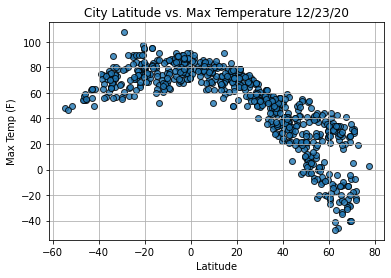

In [13]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

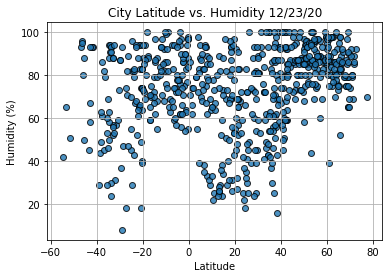

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()